In [1]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_excel('dataset1.xlsx',header=0) # Data importing

In [3]:
df

,CATEGORY,ITEM,CALORIES,TYPE,PRICE
0,STARTER,Dynamite shrimp,770.0,Vegetarian,74
1,STARTER,Halloumi fries,530.0,Vegetarian,48
2,STARTER,Baked eggplant,270.0,Vegan,36
3,STARTER,Fish cake,480.0,Vegetarian,60
4,STARTER,Lentil soup,290.0,Vegan,26
...,...,...,...,...,...
63,COLD DRINK,Ice Latte,160.0,Vegetarian,18
64,COLD DRINK,Large Water,0.0,Vegan,10
65,COLD DRINK,Small Water,0.0,Vegan,10
66,COLD DRINK,Raspberry Mojito,129.4,Vegan,28


# Read user input

In [4]:
mealTypes = ["regular" , "vegetarian" , "vegan" ]
while True:
    userType = input('Enter meal type: (hint: Regular, Vegetarian, Vegan) ')
    if userType.lower() in mealTypes:
        break
    print("\nEnter one of the following: Regular, Vegetarian, Vegan")

Enter meal type: (hint: Regular, Vegetarian, Vegan) Vegetarian


In [5]:
while True:
     try:
        userCalories = float(input('Enter calories you want in the meal: (hint: enter a number) '))
        if(userCalories<0):
             print("Enter positive numbers only")
             continue
        break
     except ValueError as e:
            print("Numbers only, Enter again") 

Enter calories you want in the meal: (hint: enter a number) 1100


In [6]:
while True:
     try:
        userBudget = float(input('Enter your budget type: (hint: enter a number) '))
        if(userBudget<0):
             print("Enter positive numbers only")
             continue
        break
     except ValueError as e:
            print("Numbers only, Enter again") 

Enter your budget type: (hint: enter a number) 250


# Initial population method

In [7]:
def insital_pop(pop_size):#هنا ليش قيمه البللوشن تتغير كل مرا لما تدخل اللست ؟؟
    populatio = df.values.tolist()# خلاها ع اساس ليست داخل قيمه اللبلوشنز 
    pop_list = []# وهنا خلاها اساس اري 
    for i in range(0, pop_size):# وهنا ليش قام حط ان رينج بتوين زيرو والبلبوشن سايز 
        pop_list.append([populatio[random.randint(0,11)] ,populatio[random.randint(12,29)], populatio[random.randint(30,47)] ,
                         populatio[random.randint(48,56)], populatio[random.randint(57,67)] ])
    return pop_list 

#اول شي  هنا راح نستقبل ععد اللبلوشنز في تحديد الرينج بعد كذا راح نخزن الداتا حقتنا داخل ليست جوا متغير ببلوشن 
#   عرفنا اري اسمها بوبلوشن ليست  راح تححتوي علئ عدد الببلوشنز ككل ، وراح تخزن ايتش  كاتقوري في اراي 
#

# Fitness Function

In [8]:
def fitness_function(meal):
    typeWeight = 0.4
    budgetWeight = 0.4
    calorieWeight = 0.2
    totalCost = 0.0
    totalCalories = 0.0
    totalWeight = 0.0
    
    
    counter = 0
    
    for item in meal:# في الوجبه الوحده لها ٥ اندكس 
        
        
        if(userType.lower() == "regular"):
            totalWeight = totalWeight + typeWeight
            totalCost =  totalCost + item[4]# هو الاندكس حق البرايس فجمعه جوا اللتوتال كوست 
            totalCalories = totalCalories + item[2]# خو الاندكس حق الكالوري وعرفنا قيمه الكالوري 
            counter = counter+1
            
        elif (userType.lower() == "vegetarian"):
            if(item[3].lower() in ["vegetarian" , "vegan"]):
                totalWeight = totalWeight + typeWeight
                totalCost =  totalCost + item[4]
                totalCalories = totalCalories + item[2]
                counter = counter+1
            
                    
        else:
             if (item[3].lower() == "vegan"):
                    totalWeight = totalWeight + typeWeight
                    totalCost =  totalCost + item[4]
                    totalCalories = totalCalories + item[2]
                    counter = counter+1## عشان يتاكد ان اليوز دخل شي 
                 
    if(counter > 0):
        totalWeight = totalWeight/counter## عشان نعرف كم طبق جوا الميل الوحده 
    
    if(totalCost <= userBudget):
        totalWeight = totalWeight + budgetWeight

    if(totalCalories<= userCalories):
        totalWeight = totalWeight + calorieWeight

    return totalWeight

# Roulette Wheel selection

In [9]:
def roulette_wheel(fitnesses):# استقبلنا الاري الي فيها مجموع الفتنسس لاطباق اي ببلوشنز 
 
    totalFitnesses = sum(fitnesses)#خزن قيمه مجموع كل  الفتنس جوا متغير اسمه توتال فتنس عشان يخلينها ان رينج   
    random_number = random.uniform(0,totalFitnesses)
    p = 0.0   # partial sum
    index = 0
    for item in fitnesses: 
        p = p + item# خزن قيمه الفتنس جوا البي وراح يقارنها ع اساس الراندوم اذا اعلا من الراندوم نمبر راح ياخذها اذر وايز بيتركها 
        if(p >= random_number):  
            return index# وهنا رجع الاندكس حقهاا 
        index = index +1   # وفي حال كانت اصغر راح يروح للي بعده 
        
        #تستخدم لاختيار الأفراد من السكان لتشكيل قاعدة الجيل التالي لى 
        #تحسين الأجيال حيث نختار في كل تكرار الأفراد الذين يحتمل أن يكونوا نافعين

# Cross Over method

In [10]:
def CrossOver(Parmeal1 , parmeal2 , crosspoint):
    i = crosspoint# لانها قيمه ما بين الواحد والاربعه ع اي اساس م اعرف 
    while  (i <= 4): 
        temp = Parmeal1[i]
        Parmeal1[i] = parmeal2[i]
        parmeal2[i] = temp 
        i = i + 1
        # فكل مرا راح يبدل قيمه يخزنها بالتيم  ثم يوديها للبيرنت تو تقريبا زي الشفتنق 
    return [Parmeal1 , parmeal2]

#تم اختيار أكثر من والد واحد ، ويتم إنتاج أكثر من ذرية باستخدام المادة الوراثية للوالدين
#يختار ع اساس الراندوم بوينت ويسوي سواب من النقطه

# Mutation method

In [11]:
def mutation(Parent):
    # سويت سكيب لاندكس صفر عشان يكون من نفس الكاتقوري 
    rand_meal = random.randint(0,pop_size-1)# اختار ميل جديده ع اساس يبدل. بالاعتماد عليهاا  
    rand_dish = random.randint(1,4)#وهنا اختار راندوم ممكن يكون طبق رئيسي  ممكن بارد ممكم حار  والخ   
    Parent[rand_dish] = initial_population[rand_meal][rand_dish]
    #فهنا قال يالبرينت ات الاندكس حقكم رقم كذا غير لي اياه بالقيمه الجديده الي اخترناها لك من الراندوم ميل 
   
    return Parent

#هي عملية التغيير العشوائي لأحد الجينات في الكروموسوم [1]. في حالتنا ، نقوم بتغيير طبق واحد في الوجبة بواسطة طبق عشوائي من السكان

# Replacement method

In [12]:
def replacement (parent , child): 
    for item in initial_population:
        if(item == parent):# راح يدور ع الببلويشين واكتشف انها موجوده فحذفها لي  وضف لي تشايلد 
            initial_population.remove(parent)
            initial_population.append(child)
            
            #هي الخطوة الأخيرة حيث يتم استبدال "الوالد" القديم بـ "الطفل" الجديد إذا كانت لياقة الطفل أفضل من الوالد.

# Check redundent method

In [13]:
def check_redundent(parent1, parent2): # to check if two meals are the same راح يبحث عنه وذا لقاه يطلعه ويدخل التسايلد الحديد
    if parent1 == parent2:
        return 1
    else:
        return 0
    
    #يقارن بين تو بيرنت اذا هم متشابهين او لا 

# Calculate fitness

In [14]:
def calculate_fitness():
    initial_pop_fitness = [] 
    for item in initial_population:# لكل طبق  جوا اللبوشنز 
          initial_pop_fitness.append(fitness_function(item))# احسب لي الفتنس فنكشن للطبق ثم خزنها جوا الاري 
    return initial_pop_fitness#رجعها لييي المين وتحتوي علئ الفتنس فكنشن للكل اللبلوشنز  

# Other supporting methods

In [15]:
def getSecond(elem):
    return elem[1]

def getFirst(elem):
    return elem[0]

In [16]:
def filtter_best_meal(meal):
    mealList = []
    for item in meal:
         if(userType.lower() == "regular"):
            return meal
#هنا كل شي بيناسبه 
         elif (userType.lower() == "vegetarian"):
            if(item[3].lower() in ["vegetarian" , "vegan"]):
                mealList.append(item)
                   #وهنا اضيف المناسب اذا كان فيجتريان جوا ماي ليست 
         else:
            if (item[3].lower() == "vegan"):
                mealList.append(item)
                
    return mealList

# تشيل الاطباق الي م  تناسب اليوزر 

# Main code

     CATEGORY                             ITEM  CALORIES        TYPE  \
0     STARTER                   Baked eggplant     270.0       Vegan   
1     DESSERT  Coconut and almond vanilla tart     320.0       Vegan   
2   HOT DRINK                        Macchiato     250.0  Vegetarian   
3  COLD DRINK                       Diet Pepsi       0.0       Vegan   

   PRICE (SR)  
0          36  
1          45  
2          20  
3          10  
-----------------------------------------------
The fitness value of the meal:  1.0
The meal price:  111.0 SR
The meal calories:  840.0 Calories


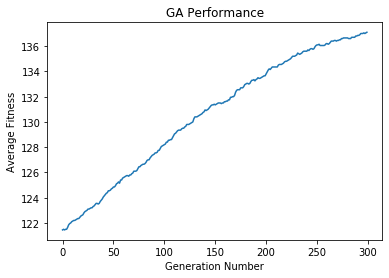

In [18]:
#GA parameters
cross_over_rate = 0.8 #we chose the highest rate because we need to crossover most of the time to improve the generation.
mutation_rate = 0.25 #the lowest the better since its increase the randomness
pop_size = 150 #e chose population size as multiple of 10 with suitable difference between them.

all_best_meals = [] #حقت كل الفيفورت ميلز 

fitness = np.array([0] * 300)

################################################
for i in range(0,19):
################################################    
    generation_counter=0
    initial_population = insital_pop(pop_size) #find the initial generation 
    
    ##راح  تحتوي علئ ليست فيها كل اللبلوشنز 
    
    while(generation_counter < 300):   
            
            # Calculate the total fitness for the population 
            initial_pop_fitness = calculate_fitness() # تحتوي علئ كل الفتنس فنكشن للاطباق اي ببلوشنز 


            fitness[generation_counter] = fitness[generation_counter] + sum(initial_pop_fitness)
            # هنا جوا اريي الفتنس راح يجمع قيم الانيشال ببلوشنز فتنس عشان الرسمه 

            parent1_index = roulette_wheel(initial_pop_fitness) # Find the index of the first parent to choose
            parent1 = initial_population[parent1_index] # Retrieve the parent


            parent2_index = roulette_wheel(initial_pop_fitness) # Find the index of the second parent to choose
            parent2 = initial_population[parent2_index] # Retrieve the parent


            while(check_redundent(parent1.copy() , parent2.copy()) == 1):# عشان يتاكد ان مو كل الطبقين زي بعض 
                parent2_index = roulette_wheel(initial_pop_fitness)# في حال تشابهوا راح يرجع يختار  قيمه جديده للطبق 
                parent2 = initial_population[parent2_index]

            flag = False

            cross_point = random.uniform(0,1) #[0,1]هو قيمه راندوم بتوين الزيرو والون 

            if(cross_point <= cross_over_rate): 
                ################################################################################################
                offspring = CrossOver(parent1.copy(), parent2.copy(), random.randint(1,4)) # [1,4]
                ################################################################################################
                flag = True# بمعنئ ان سوا كروس اوفرر وخلصص 


            mutation_number = random.uniform(0,1) 
            if(mutation_number <= mutation_rate and flag == True):# اذا سوا كروس اوفر
                offspring1 = mutation(offspring[0].copy())# تسوي ميوتيشن للاوف سبرنق 
                offspring2 = mutation(offspring[1].copy())
                offspring = [offspring1, offspring2]
                flag = True


            if(mutation_number <= mutation_rate and flag == False): # اذا م سوا كروس اوفرر 
                offspring1 = mutation(parent1.copy())# تسوي ميوتيشن للبيرنت بس مو الاوفسبرينق 
                offspring2 = mutation(parent2.copy())#
                offspring = [offspring1, offspring2]
                flag = True



            if(flag ==True):
                meal_fitness = []
                meal_fitness.append([offspring[0] , fitness_function(offspring[0])])
                meal_fitness.append([offspring[1] , fitness_function(offspring[1])])
                meal_fitness.append([parent1 , initial_pop_fitness[parent1_index]])
                meal_fitness.append([parent2 , initial_pop_fitness[parent2_index]])
                meal_fitness.sort(key=getSecond) #sort according to the fitness (ascending)
                best1 = meal_fitness[3]
                best2 = meal_fitness[2]
                replacement(parent1 , best1[0])
                replacement(parent2 , best2[0])


            generation_counter = generation_counter + 1

        
    initial_pop_fitness = calculate_fitness() 

    Meals = []#   ففيها افضل رن من العشرين رن للفه الوحد 
    #تحتوي ع افضل انفجوالز من كل رن من العشرين
    #هو بيسوي عشرين لفه للرن الواحد ف يبدا في اول لفه يشوف وش. احسن وحده فيهم ويخزنها ثم يروح للفه الثاني ويخزن افضل وحده 
    for i in range(len(initial_population)-1):
        Meals.append([initial_pop_fitness[i] , initial_population[i]]) #خزن فيها الببلوشنز + الفتنس لها سوا 

    #sort   
    Meals.sort(key=getFirst)

    best_Meal = Meals[len(Meals)-1][1] #لان البيست ميلل اخذها من الميلز وراح لاخر اندكس عشان يحصل اخر وحده 
    best_Meal_fit = Meals[len(Meals)-1][0]
    
    all_best_meals.append([best_Meal_fit, best_Meal]) # اخذ اخر رن من العشرين الي خزناها بالميلز واخر واحد افضل  بيكون لان محسن كثيرر  

all_best_meals.sort(key=getFirst)
best_Meal = all_best_meals[len(all_best_meals)-1][1] # هذي السورت تاخذ احسن رن من ٣٠٠ الي سواها قبل 
best_Meal_fit = all_best_meals[len(all_best_meals)-1][0]

best_Meal = filtter_best_meal(best_Meal) 

bestMealCalorie = 0.0
bestMealPrice = 0.0

for item in best_Meal:
    bestMealCalorie = bestMealCalorie + item[2]
    bestMealPrice = bestMealPrice + item[4]


the_resulted_meal = pd.DataFrame(best_Meal, columns = ["CATEGORY", "ITEM", "CALORIES" , "TYPE", "PRICE (SR)" ])
print(the_resulted_meal)
print("-----------------------------------------------")
print("The fitness value of the meal: ", best_Meal_fit)
print("The meal price: ", bestMealPrice , "SR")
print("The meal calories: ", bestMealCalorie, "Calories")  


x_axis= range(0, 300)
y_axis = [] 
for item in fitness:
    y_axis.append(item/20)

plt.figure()
plt.title("GA Performance")
plt.xlabel('Generation Number')
plt.ylabel('Average Fitness') 
plt.plot(x_axis,y_axis)

plt.show()